<h1><center> EDA - G2M Insight for Cab Investment Firm </center></h1>

<p> 
The private firm XYZ is interested in doing an investment in the Cab industry. I am going to provide indight on two different cab companies and help XYZ choose the most rentable one for their investment.
</p>

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import xlrd

In [68]:
# Define the different directories we are going to work with
data_dir = './Data/'

I was provided with two different data sets that include different information for bothe cab companies. These data sets are distributed as follows:
- Cab_Data.csv – this file includes details of transaction for 2 cab companies
- Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details
- Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode
- City.csv – this file contains list of US cities, their population and number of cab users


In [69]:
# Open the different data sets. This is a description of what each of the files is:
cab_data_df = pd.read_csv(data_dir+'Cab_Data.csv', engine='python')
customerID_df = pd.read_csv(data_dir+'Customer_ID.csv', engine='python')
transactionID_df = pd.read_csv(data_dir+'Transaction_ID.csv', engine='python')
city_df = pd.read_csv(data_dir+'City.csv', engine='python')

We now want to find the correlation between these data sets and create a Master data set that we can use to extract the different information from as well as isolate the missing values in the separate data sets.
We first correlate the data sets by Customer ID, then by transaction ID

In [70]:
# Merge the Dataframes transactionID_df and CustomerID_df by Customer ID
customer_merge_df = pd.merge(customerID_df, transactionID_df, on='Customer ID').reset_index(drop=True)

# Merge the Dataframes customer_merge_df and cab_data_df by Transaction ID
master_df = pd.merge(cab_data_df, customer_merge_df, on='Transaction ID').reset_index(drop=True)

In [71]:
# Re-format the date column to a more readable format
master_df['Date of Travel'] = np.array([xlrd.xldate_as_datetime(dt,0).date().isoformat() for dt in master_df['Date of Travel'].values])

Finally, we are going to separate the information from both cab companies

In [72]:
# Separate the master_df into the 2 different companies
yellow_cab_df = master_df[master_df['Company'] == 'Yellow Cab'].sort_values('Date of Travel').reset_index(drop=True)
pink_cab_df = master_df[master_df['Company'] == 'Pink Cab'].sort_values('Date of Travel').reset_index(drop=True)

In [73]:
yellow_cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000384,2016-01-02,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Male,23,8542,Card
1,10000706,2016-01-02,Yellow Cab,LOS ANGELES CA,18.90,490.31,235.8720,7500,Male,30,22859,Cash
2,10000705,2016-01-02,Yellow Cab,LOS ANGELES CA,6.84,179.26,93.5712,7936,Male,60,9678,Cash
3,10000525,2016-01-02,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,4551,Male,19,6316,Cash
4,10000526,2016-01-02,Yellow Cab,CHICAGO IL,16.80,397.98,205.6320,3820,Male,39,18836,Card


In [74]:
pink_cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000164,2016-01-02,Pink Cab,PHOENIX AZ,8.55,114.15,89.775,22469,Male,37,4378,Card
1,10000060,2016-01-02,Pink Cab,CHICAGO IL,35.34,500.22,395.808,3330,Male,46,5216,Card
2,10000070,2016-01-02,Pink Cab,DENVER CO,7.02,61.30,82.836,30718,Male,52,20255,Cash
3,10000127,2016-01-02,Pink Cab,LOS ANGELES CA,38.00,850.87,425.600,7539,Male,40,24169,Card
4,10000370,2016-01-02,Pink Cab,TUCSON AZ,5.40,94.49,58.320,39975,Male,40,7931,Card


Once the data sets have been combined and classified, we can start developing differetn hypothesis about the profitability of both cab companies. In order to determine which company is a better investment, we considered the following factors:

- Which company has more transactions per year and month?
- Which year and month seems to be the most profitable for each company?
- What is the averge cost per distance traveled?
- Which company has more riders per city?
- Which city is more profitable to ride on?

<h2> 1. Which company has more transactions per year and month? </h2>
In order to answer this question, I am going to separate each company data set by year and month

In [75]:
# Get the year and month from the transaction date for each company data set
yellow_cab_df['Year'] = pd.DatetimeIndex(yellow_cab_df['Date of Travel']).year
yellow_cab_df['Month'] = pd.DatetimeIndex(yellow_cab_df['Date of Travel']).month

pink_cab_df['Year'] = pd.DatetimeIndex(pink_cab_df['Date of Travel']).year
pink_cab_df['Month'] = pd.DatetimeIndex(pink_cab_df['Date of Travel']).month

In [76]:
# Count the number of transactions for each company by year 
yellow_annual_transactions = yellow_cab_df.groupby(['Year'])['Transaction ID'].count()
pink_annual_transactions = pink_cab_df.groupby(['Year'])['Transaction ID'].count()

# Count the number of transactions by year and month
yellow_monthly_transactions = yellow_cab_df.groupby(['Year','Month'])['Transaction ID'].count()
pink_monthly_transactions = pink_cab_df.groupby(['Year','Month'])['Transaction ID'].count()

# Count the number of transactions per month from 2016 to 2018
yellow_total_monthly_transactions = yellow_cab_df.groupby(['Month'])['Transaction ID'].count()
pink_total_monthly_transactions = pink_cab_df.groupby(['Month'])['Transaction ID'].count()

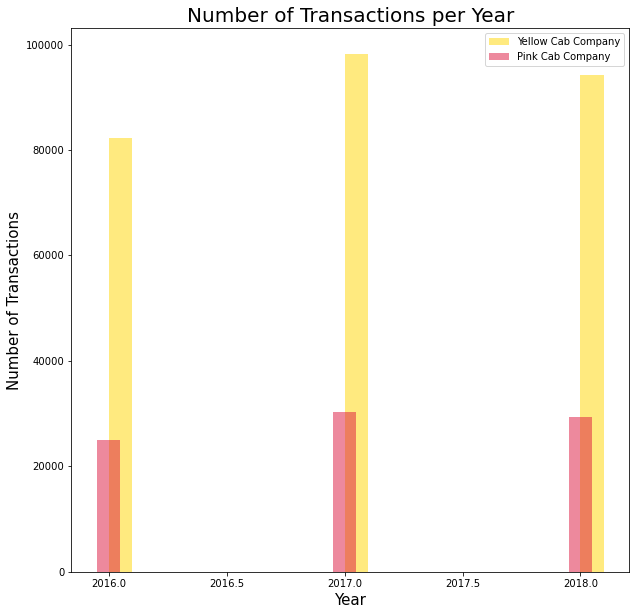

In [77]:
# Plot the number of transactions per year for each company
plt.figure(figsize=(10,10))
plt.title('Number of Transactions per Year', size=20)
plt.xlabel('Year', size=15)
plt.ylabel('Number of Transactions', size=15)
plt.bar(yellow_annual_transactions.index, yellow_annual_transactions.values, width=0.1, align='edge', color='gold', alpha=0.5, label='Yellow Cab Company')
plt.bar(pink_annual_transactions.index, pink_annual_transactions.values, width=0.1, color='crimson', alpha=0.5, label='Pink Cab Company')
plt.legend()
plt.show()

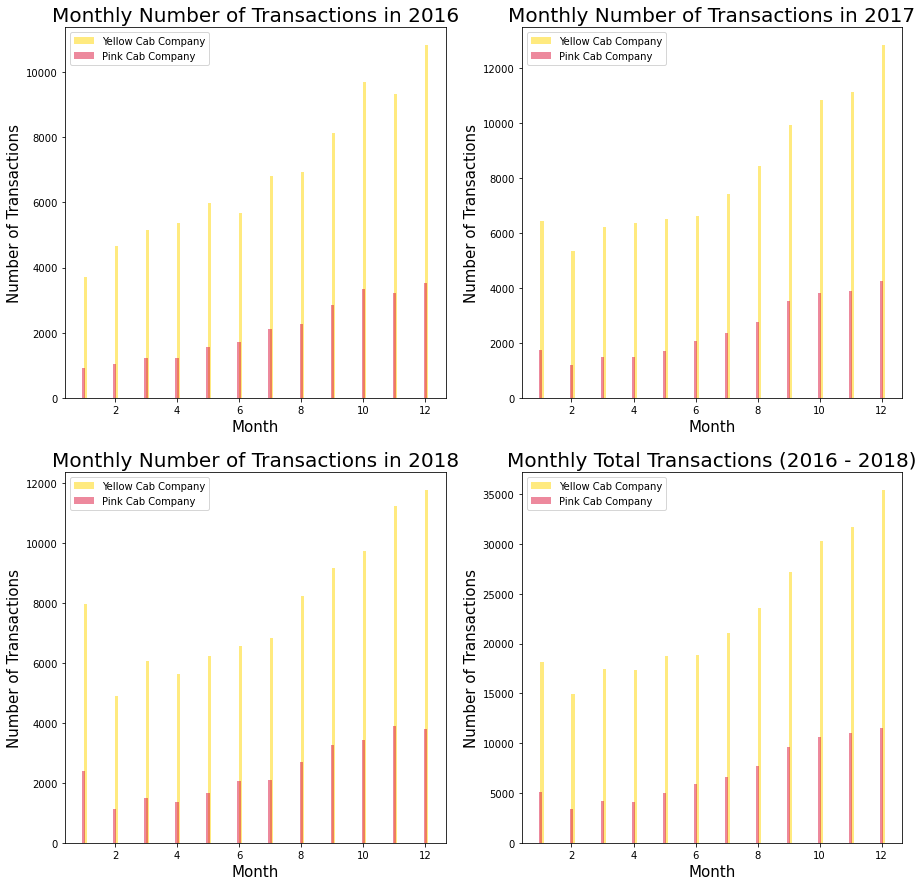

In [78]:
# Plot the number of transactions per year per month
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('Monthly Number of Transactions in 2016', size=20)
plt.xlabel('Month', size=15)
plt.ylabel('Number of Transactions', size=15)
plt.bar(yellow_monthly_transactions.loc[2016].index, yellow_monthly_transactions.loc[2016].values, width=0.1, align='edge', color='gold', alpha=0.5, label='Yellow Cab Company')
plt.bar(pink_monthly_transactions.loc[2016].index, pink_monthly_transactions.loc[2016].values, width=0.1, color='crimson', alpha=0.5, label='Pink Cab Company')
plt.legend()

plt.subplot(222)
plt.title('Monthly Number of Transactions in 2017', size=20)
plt.xlabel('Month', size=15)
plt.ylabel('Number of Transactions', size=15)
plt.bar(yellow_monthly_transactions.loc[2017].index, yellow_monthly_transactions.loc[2017].values, width=0.1, align='edge', color='gold', alpha=0.5, label='Yellow Cab Company')
plt.bar(pink_monthly_transactions.loc[2017].index, pink_monthly_transactions.loc[2017].values, width=0.1, color='crimson', alpha=0.5, label='Pink Cab Company')
plt.legend()

plt.subplot(223)
plt.title('Monthly Number of Transactions in 2018', size=20)
plt.xlabel('Month', size=15)
plt.ylabel('Number of Transactions', size=15)
plt.bar(yellow_monthly_transactions.loc[2018].index, yellow_monthly_transactions.loc[2018].values, width=0.1, align='edge', color='gold', alpha=0.5, label='Yellow Cab Company')
plt.bar(pink_monthly_transactions.loc[2018].index, pink_monthly_transactions.loc[2018].values, width=0.1, color='crimson', alpha=0.5, label='Pink Cab Company')
plt.legend()

plt.subplot(224)
plt.title('Monthly Total Transactions (2016 - 2018)', size=20)
plt.xlabel('Month', size=15)
plt.ylabel('Number of Transactions', size=15)
plt.bar(yellow_total_monthly_transactions.index, yellow_total_monthly_transactions.values, width=0.1, align='edge', color='gold', alpha=0.5, label='Yellow Cab Company')
plt.bar(pink_total_monthly_transactions.index, pink_total_monthly_transactions.values, width=0.1, color='crimson', alpha=0.5, label='Pink Cab Company')
plt.legend()

plt.show()

From the plots above it can be seen that Yeallow Cab is the company that generates more transactions anually. On the 3-year period that this data was collected, 2017 seems to be the year that more transactions were completed for each company.

Now, when I look at the data for each month of the 3 years it can be seen that Yellow Cab is always the company with the most transactions. Another trent that can be observed is that for Yellow Cab, December is the month were the most transactions are completed. For Pink Cab that same trent is not seen since in 2018 the month with the most transactions is November. On the other hand, the month with the least ammount of transactions is February overall for both companies. The exception would be the year 2017, when January was the least profitable month for both companies.

<h2> 2. Which year and moth is the most profitable? </h2>

For this hypothesis, I'm going to be analyzing the prices charged per transaction for each year individually as well as an overall analysis of the profit for each company

In [79]:
# Calculate the profit for each company
# Profit = Price Charged - Transaction Price
yellow_cab_df['Profit'] = yellow_cab_df['Price Charged'] - yellow_cab_df['Cost of Trip']
pink_cab_df['Profit'] = pink_cab_df['Price Charged'] - pink_cab_df['Cost of Trip']

In [80]:
# Compute the annual profit for each company
yellow_annual_profit = yellow_cab_df.groupby(['Year'])['Profit'].sum()
pink_annual_profit = pink_cab_df.groupby(['Year'])['Profit'].sum()

# Compute the profit per year per month for each company
yellow_monthly_profit = yellow_cab_df.groupby(['Year','Month'])['Profit'].sum()
pink_monthly_profit = pink_cab_df.groupby(['Year','Month'])['Profit'].sum()

# Compute the total monthly profit
yellow_total_monthly_profit = yellow_cab_df.groupby(['Month'])['Profit'].sum()
pink_total_monthly_profit = pink_cab_df.groupby(['Month'])['Profit'].sum()

/tmp/ipykernel_15408/430014174.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])


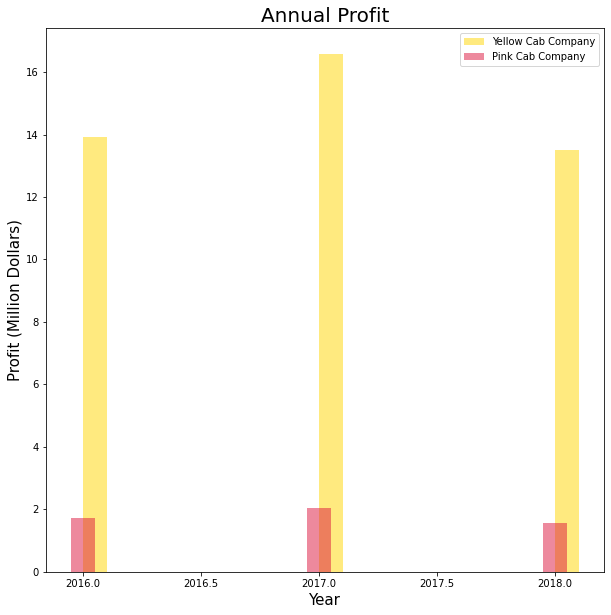

In [81]:
# Plot the annual profit for each company
plt.figure(figsize=(10,10))
plt.title('Annual Profit', size=20)
plt.xlabel('Year', size=15)
plt.ylabel('Profit (Million Dollars)', size=15)
plt.bar(yellow_annual_profit.index, yellow_annual_profit.values/1000000, width=0.1, align='edge', color='gold', alpha=0.5, label='Yellow Cab Company')
plt.bar(pink_annual_profit.index, pink_annual_profit.values/1000000, width=0.1, color='crimson', alpha=0.5, label='Pink Cab Company')
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.legend()
plt.show()

/tmp/ipykernel_15408/272591368.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in plt.gca().get_yticks()])
/tmp/ipykernel_15408/272591368.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in plt.gca().get_yticks()])
/tmp/ipykernel_15408/272591368.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in plt.gca().get_yticks()])
/tmp/ipykernel_15408/272591368.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in plt.gca().get_yticks()])


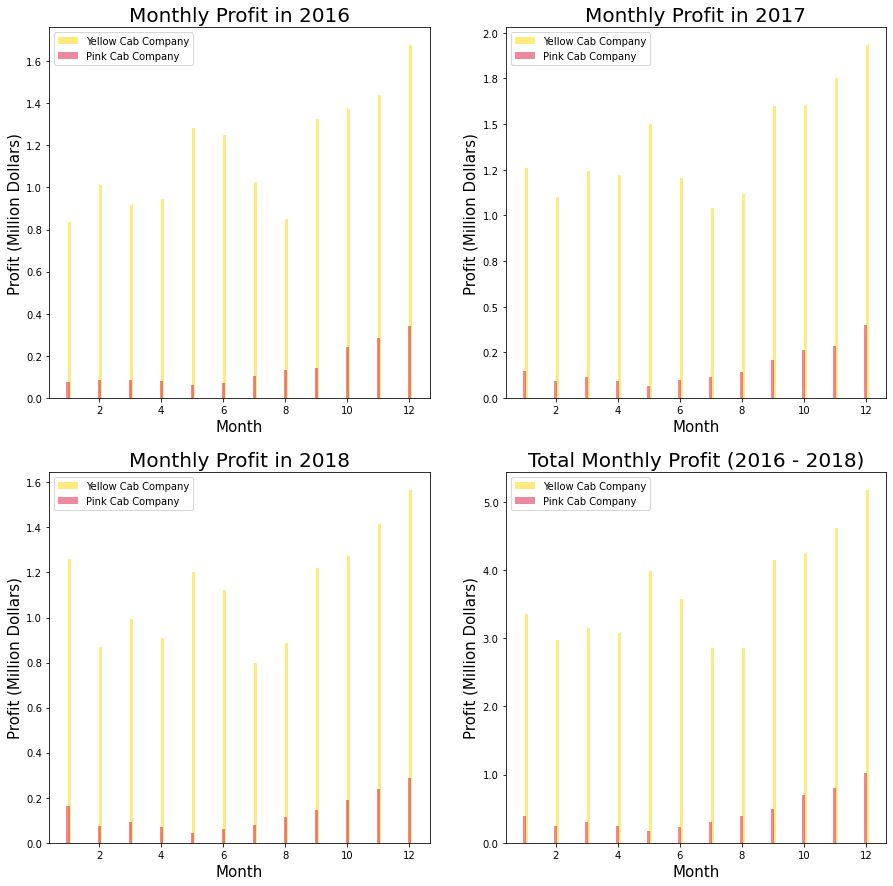

In [82]:
# Plot the monthly profit per year
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('Monthly Profit in 2016', size=20)
plt.xlabel('Month', size=15)
plt.ylabel('Profit (Million Dollars)', size=15)
plt.bar(yellow_monthly_profit.loc[2016].index, yellow_monthly_profit.loc[2016].values/1000000, width=0.1, align='edge', color='gold', alpha=0.5, label='Yellow Cab Company')
plt.bar(pink_monthly_profit.loc[2016].index, pink_monthly_profit.loc[2016].values/1000000, width=0.1, color='crimson', alpha=0.5, label='Pink Cab Company')
plt.legend()
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in plt.gca().get_yticks()])


plt.subplot(222)
plt.title('Monthly Profit in 2017', size=20)
plt.xlabel('Month', size=15)
plt.ylabel('Profit (Million Dollars)', size=15)
plt.bar(yellow_monthly_profit.loc[2017].index, yellow_monthly_profit.loc[2017].values/1000000, width=0.1, align='edge', color='gold', alpha=0.5, label='Yellow Cab Company')
plt.bar(pink_monthly_profit.loc[2017].index, pink_monthly_profit.loc[2017].values/1000000, width=0.1, color='crimson', alpha=0.5, label='Pink Cab Company')
plt.legend()
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in plt.gca().get_yticks()])

plt.subplot(223)
plt.title('Monthly Profit in 2018', size=20)
plt.xlabel('Month', size=15)
plt.ylabel('Profit (Million Dollars)', size=15)
plt.bar(yellow_monthly_profit.loc[2018].index, yellow_monthly_profit.loc[2018].values/1000000, width=0.1, align='edge', color='gold', alpha=0.5, label='Yellow Cab Company')
plt.bar(pink_monthly_profit.loc[2018].index, pink_monthly_profit.loc[2018].values/1000000, width=0.1, color='crimson', alpha=0.5, label='Pink Cab Company')
plt.legend()
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in plt.gca().get_yticks()])

plt.subplot(224)
plt.title('Total Monthly Profit (2016 - 2018)', size=20)
plt.xlabel('Month', size=15)
plt.ylabel('Profit (Million Dollars)', size=15)
plt.bar(yellow_total_monthly_profit.index, yellow_total_monthly_profit.values/1000000, width=0.1, align='edge', color='gold', alpha=0.5, label='Yellow Cab Company')
plt.bar(pink_total_monthly_profit.index, pink_total_monthly_profit.values/1000000, width=0.1, color='crimson', alpha=0.5, label='Pink Cab Company')
plt.legend()
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in plt.gca().get_yticks()])

plt.show()

As it can be seen from the plots above, Yellow Cab has been the most profitable company from 2016 to 2018 compared with Pink Cab. For both companies the most profitable year was 2017. This results can be correlated to the number of transactions that was performed by each company during these years. Since Yellow Cab has provided the most rides, it is expected that Yellow Cab generates the most profit, which it is reflected by the data.

Now, in terms of monthly profit, overall it seems that December is the most profitable month for each company. For Yellow Cab its least profitable month was August and for Pink Cab was may. These results do not support the initial hypotheis that the number of transactions is directly correlated to the profit made per month. Other factors like customer's tips or travelled distance should be considered then.

<h2> 3. What is the average profit per distance travelled? </h2>

We saw on my previous point that the monthly and annual profit is not fully correlated to the number of transactions done by each company. I postulated that there could be an external factor such as the distance travelled. Thus, here we are going tho analyze the correlation between price charged per ride and distance.

In [83]:
# Group the charged price by year
yellow_annual_km_profit = yellow_cab_df.groupby(['Year', 'Month', 'KM Travelled'])['Profit'].sum()
pink_annual_km_profit = pink_cab_df.groupby(['Year', 'Month', 'KM Travelled'])['Profit'].sum()
yellow_annual_km_profit.loc[2016].index.get_level_values(level=1)

Float64Index([  1.9,  1.92,  1.94,  1.96,  1.98,   2.0,  2.04,  2.08,   2.1,
               2.12,
              ...
               45.6, 45.63,  46.0, 46.02,  46.4, 46.41,  46.8,  47.2,  47.6,
               48.0],
             dtype='float64', name='KM Travelled', length=10441)

In [84]:
yellow_annual_km_profit.loc[2016].values

array([  51.742,   93.926,   72.412, ..., 3980.726, 4805.598, 5312.74 ])

In [85]:
# Create a linear fit to each anual data
yellow_profit_per_km_2016 = np.polyfit(yellow_annual_km_profit.loc[2016].index.get_level_values(level=1), yellow_annual_km_profit.loc[2016].values, 1)
yellow_profit_per_km_2017 = np.polyfit(yellow_annual_km_profit.loc[2017].index.get_level_values(level=1), yellow_annual_km_profit.loc[2017].values, 1)
yellow_profit_per_km_2018 = np.polyfit(yellow_annual_km_profit.loc[2018].index.get_level_values(level=1), yellow_annual_km_profit.loc[2018].values, 1)

pink_profit_per_km_2016 = np.polyfit(pink_annual_km_profit.loc[2016].index.get_level_values(level=1), pink_annual_km_profit.loc[2016].values, 1)
pink_profit_per_km_2017 = np.polyfit(pink_annual_km_profit.loc[2017].index.get_level_values(level=1), pink_annual_km_profit.loc[2017].values, 1)
pink_profit_per_km_2018 = np.polyfit(pink_annual_km_profit.loc[2018].index.get_level_values(level=1), pink_annual_km_profit.loc[2018].values, 1)

# Define a function to create a line based on the parameters above
def line(x, m, b): return m*x + b


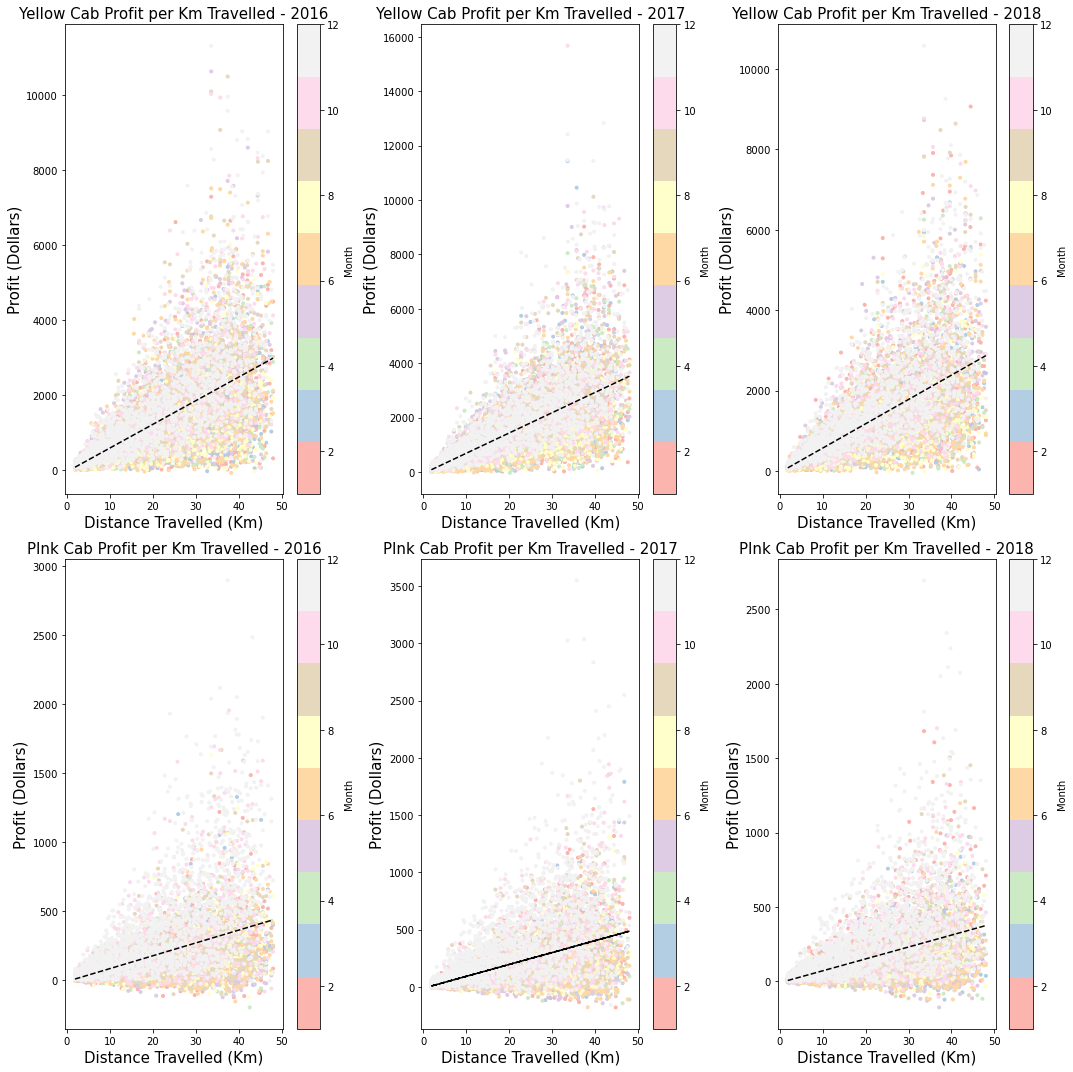

In [86]:
# Create a scatter plot of the profit as a function of distance travelled

plt.figure(figsize=(15,15))
cm = plt.cm.get_cmap('Pastel1')

plt.subplot(231)
plt.title('Yellow Cab Profit per Km Travelled - 2016', size=15)
plt.xlabel('Distance Travelled (Km)', size=15)
plt.ylabel('Profit (Dollars)', size=15)
plt.scatter(yellow_annual_km_profit.loc[2016].index.get_level_values(level=1), yellow_annual_km_profit.loc[2016].values, marker='.', \
            c=yellow_annual_km_profit.loc[2016].index.get_level_values(level=0), cmap=cm)
plt.plot(yellow_annual_km_profit.loc[2016].index.get_level_values(level=1), line(yellow_annual_km_profit.loc[2016].index.get_level_values(level=1), *yellow_profit_per_km_2016), 'k--')
plt.colorbar(label='Month')

plt.subplot(232)
plt.title('Yellow Cab Profit per Km Travelled - 2017', size=15)
plt.xlabel('Distance Travelled (Km)', size=15)
plt.ylabel('Profit (Dollars)', size=15)
plt.scatter(yellow_annual_km_profit.loc[2017].index.get_level_values(level=1), yellow_annual_km_profit.loc[2017].values, marker='.', \
            c=yellow_annual_km_profit.loc[2017].index.get_level_values(level=0), cmap=cm)
plt.plot(yellow_annual_km_profit.loc[2017].index.get_level_values(level=1), line(yellow_annual_km_profit.loc[2017].index.get_level_values(level=1), *yellow_profit_per_km_2017), 'k--')
plt.colorbar(label='Month')

plt.subplot(233)
plt.title('Yellow Cab Profit per Km Travelled - 2018', size=15)
plt.xlabel('Distance Travelled (Km)', size=15)
plt.ylabel('Profit (Dollars)', size=15)
plt.scatter(yellow_annual_km_profit.loc[2018].index.get_level_values(level=1), yellow_annual_km_profit.loc[2018].values, marker='.', \
            c=yellow_annual_km_profit.loc[2018].index.get_level_values(level=0), cmap=cm)
plt.plot(yellow_annual_km_profit.loc[2018].index.get_level_values(level=1), line(yellow_annual_km_profit.loc[2018].index.get_level_values(level=1), *yellow_profit_per_km_2018), 'k--')
plt.colorbar(label='Month')

plt.subplot(234)
plt.title('PInk Cab Profit per Km Travelled - 2016', size=15)
plt.xlabel('Distance Travelled (Km)', size=15)
plt.ylabel('Profit (Dollars)', size=15)
plt.scatter(pink_annual_km_profit.loc[2016].index.get_level_values(level=1), pink_annual_km_profit.loc[2016].values, marker='.', \
            c=pink_annual_km_profit.loc[2016].index.get_level_values(level=0), cmap=cm)
plt.plot(pink_annual_km_profit.loc[2016].index.get_level_values(level=1), line(pink_annual_km_profit.loc[2016].index.get_level_values(level=1), *pink_profit_per_km_2016), 'k--')
plt.colorbar(label='Month')

plt.subplot(235)
plt.title('PInk Cab Profit per Km Travelled - 2017', size=15)
plt.xlabel('Distance Travelled (Km)', size=15)
plt.ylabel('Profit (Dollars)', size=15)
plt.scatter(pink_annual_km_profit.loc[2017].index.get_level_values(level=1), pink_annual_km_profit.loc[2017].values, marker='.', \
            c=pink_annual_km_profit.loc[2017].index.get_level_values(level=0), cmap=cm)
plt.plot(pink_annual_km_profit.loc[2017].index.get_level_values(level=1), line(pink_annual_km_profit.loc[2017].index.get_level_values(level=1), *pink_profit_per_km_2017), 'k--')
plt.colorbar(label='Month')

plt.subplot(236)
plt.title('PInk Cab Profit per Km Travelled - 2018', size=15)
plt.xlabel('Distance Travelled (Km)', size=15)
plt.ylabel('Profit (Dollars)', size=15)
plt.scatter(pink_annual_km_profit.loc[2018].index.get_level_values(level=1), pink_annual_km_profit.loc[2018].values, marker='.', \
            c=pink_annual_km_profit.loc[2018].index.get_level_values(level=0), cmap=cm)
plt.plot(pink_annual_km_profit.loc[2018].index.get_level_values(level=1), line(pink_annual_km_profit.loc[2018].index.get_level_values(level=1), *pink_profit_per_km_2018), 'k--')
plt.colorbar(label='Month')

plt.tight_layout()
plt.show()

In [87]:
print(f'During 2016, Yellow Cab generated ${round(yellow_profit_per_km_2016[0], 2)} per Km')
print(f'During 2017, Yellow Cab generated ${round(yellow_profit_per_km_2017[0], 2)} per Km')
print(f'During 2018, Yellow Cab generated ${round(yellow_profit_per_km_2018[0], 2)} per Km')

During 2016, Yellow Cab generated $63.21 per Km
During 2017, Yellow Cab generated $74.59 per Km
During 2018, Yellow Cab generated $60.58 per Km


In [88]:
print(f'During 2016, Pink Cab generated ${round(pink_profit_per_km_2016[0], 2)} per Km')
print(f'During 2017, Pink Cab generated ${round(pink_profit_per_km_2017[0], 2)} per Km')
print(f'During 2018, Pink Cab generated ${round(pink_profit_per_km_2018[0], 2)} per Km')

During 2016, Pink Cab generated $9.3 per Km
During 2017, Pink Cab generated $10.39 per Km
During 2018, Pink Cab generated $8.0 per Km


THe values above represent how muxh profit each company made annually per travelled Km. The plot above was color coded based on the month when the ride took place. Now let's look at the frequency of rides per distance traveled.

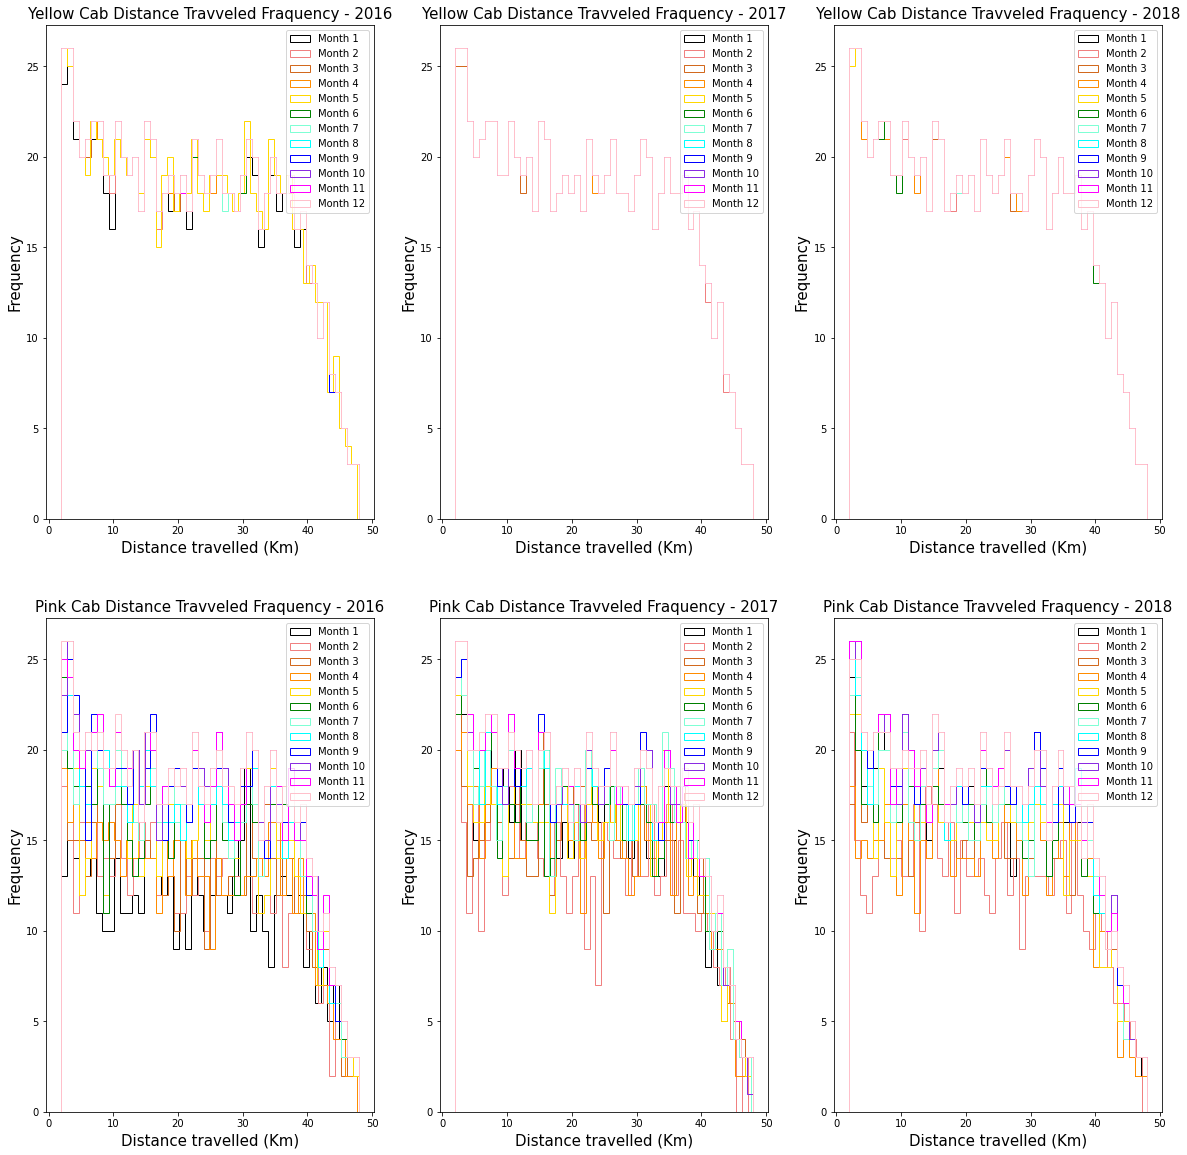

In [89]:
# Define the colors corresponding to each of the months
colors = ['black','lightcoral','chocolate','darkorange','gold','green','aquamarine','cyan','blue','blueviolet','fuchsia','pink']
plt.figure(figsize=(20,20))

for i, month in enumerate(set(yellow_annual_km_profit.loc[2016].index.get_level_values(level=0).values)):
    plt.subplot(231)
    plt.title('Yellow Cab Distance Travveled Fraquency - 2016', size=15)
    plt.ylabel('Frequency', size=15)
    plt.xlabel('Distance travelled (Km)', size=15)
    plt.hist(yellow_annual_km_profit.loc[2016].loc[month].index, bins=50, color=colors[i], edgecolor=colors[i], \
             fc=None, histtype='step', label=f'Month {month}')
    plt.legend()
    
    plt.subplot(232)
    plt.title('Yellow Cab Distance Travveled Fraquency - 2017', size=15)
    plt.ylabel('Frequency', size=15)
    plt.xlabel('Distance travelled (Km)', size=15)
    plt.hist(yellow_annual_km_profit.loc[2017].loc[month].index, bins=50, color=colors[i], edgecolor=colors[i], \
             fc=None, histtype='step', label=f'Month {month}')
    plt.legend()
    plt.subplot(233)
    plt.title('Yellow Cab Distance Travveled Fraquency - 2018', size=15)
    plt.ylabel('Frequency', size=15)
    plt.xlabel('Distance travelled (Km)', size=15)
    plt.hist(yellow_annual_km_profit.loc[2018].loc[month].index, bins=50, color=colors[i], edgecolor=colors[i], \
             fc=None, histtype='step', label=f'Month {month}')
    plt.legend()
    
    plt.subplot(234)
    plt.title('Pink Cab Distance Travveled Fraquency - 2016', size=15)
    plt.ylabel('Frequency', size=15)
    plt.xlabel('Distance travelled (Km)', size=15)
    plt.hist(pink_annual_km_profit.loc[2016].loc[month].index, bins=50, color=colors[i], edgecolor=colors[i], \
             fc=None, histtype='step', label=f'Month {month}')
    plt.legend()
    
    plt.subplot(235)
    plt.title('Pink Cab Distance Travveled Fraquency - 2017', size=15)
    plt.ylabel('Frequency', size=15)
    plt.xlabel('Distance travelled (Km)', size=15)
    plt.hist(pink_annual_km_profit.loc[2017].loc[month].index, bins=50, color=colors[i], edgecolor=colors[i], \
             fc=None, histtype='step', label=f'Month {month}')
    plt.legend()
    
    plt.subplot(236)
    plt.title('Pink Cab Distance Travveled Fraquency - 2018', size=15)
    plt.ylabel('Frequency', size=15)
    plt.xlabel('Distance travelled (Km)', size=15)
    plt.hist(pink_annual_km_profit.loc[2018].loc[month].index, bins=50, color=colors[i], edgecolor=colors[i], \
             fc=None, histtype='step', label=f'Month {month}')
    plt.legend()
    
plt.show()
    

From these histograms, it seems that regardles of the month, those trips that are less than 5 Km in distance are the most common and those grater than 45 Km are lthe least common. It can also be seen that there's is a consistency in the frequency of rides between 5 Km and 40 Km. therefore, since there is a higer consentration of rides within this distance travelled ranged, it can be concluded that at those travelled distances is where these companies make the best profit

<h2> 4. Which Company Provides the Most Rides per City? </h2>
Now let's look into which city is it better to invest in and which company should be selected.

In [90]:
# Group the data by city and number of rides
yellow_city_transactions = yellow_cab_df.groupby(['City'])['Transaction ID'].count()
pink_city_transactions = pink_cab_df.groupby(['City'])['Transaction ID'].count()

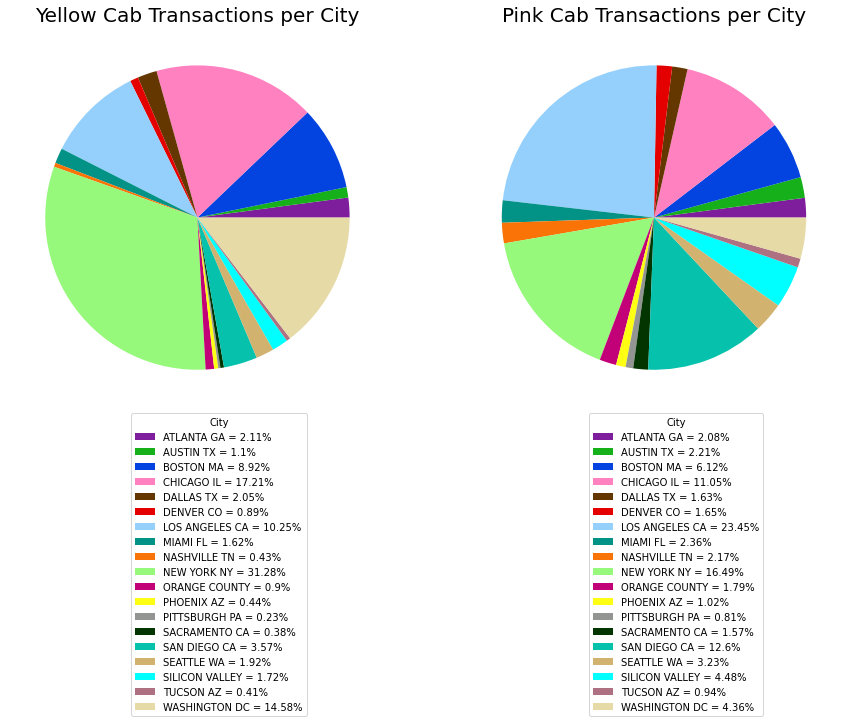

In [93]:
# Create a pie chart for each of the companies and the total number of transactions
pc_colors = ['#7e1e9c','#15b01a','#0343df','#ff81c0','#653700','#e50000','#95d0fc','#029386','#f97306','#96f97b', \
             '#c20078','#ffff14','#929591','#033500','#06c2ac','#d1b26f','#00ffff','#ae7181','#e6daa6']

fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].set_title('Yellow Cab Transactions per City', size=20)
ax[0].pie(yellow_city_transactions.values, colors=pc_colors)

ax[1].set_title('Pink Cab Transactions per City', size=20)
ax[1].pie(pink_city_transactions.values, colors=pc_colors)

ax[0].legend(labels=[f'{yellow_city_transactions.index[i]} = {round((yellow_city_transactions.values[i]/yellow_city_transactions.values.sum())*100., 2)}%' for i in range(yellow_city_transactions.index.size)], \
             title='City', bbox_to_anchor =(0.8, 0.))
ax[1].legend(labels=[f'{pink_city_transactions.index[i]} = {round((pink_city_transactions.values[i]/pink_city_transactions.values.sum())*100., 2)}%' for i in range(pink_city_transactions.index.size)], \
             title='City', bbox_to_anchor =(0.8, 0.))

plt.show()


It can be seen from these Pie Charts that each company has a higer demand in different cities. For Yellow Cab, the top 3 cities with the most number on transactions are New York City, Chicago, and Washington DC. On the other hand, the top 3 cities where Pink Cab has the highest demand are Los Angeles, New York, and San Diego.

<h2> 5. Which City Generates the Most Profit? </h2>

Now the we have looked at what companies provide more rides at each city, let's look at what city generates the most profit for each company.

In [ ]:
# Group the data by city and profit
yellow_city_profit = yellow_cab_df.groupby(['City'])['Profit'].sum()
pink_city_profit = pink_cab_df.groupby(['City'])['Profit'].sum()

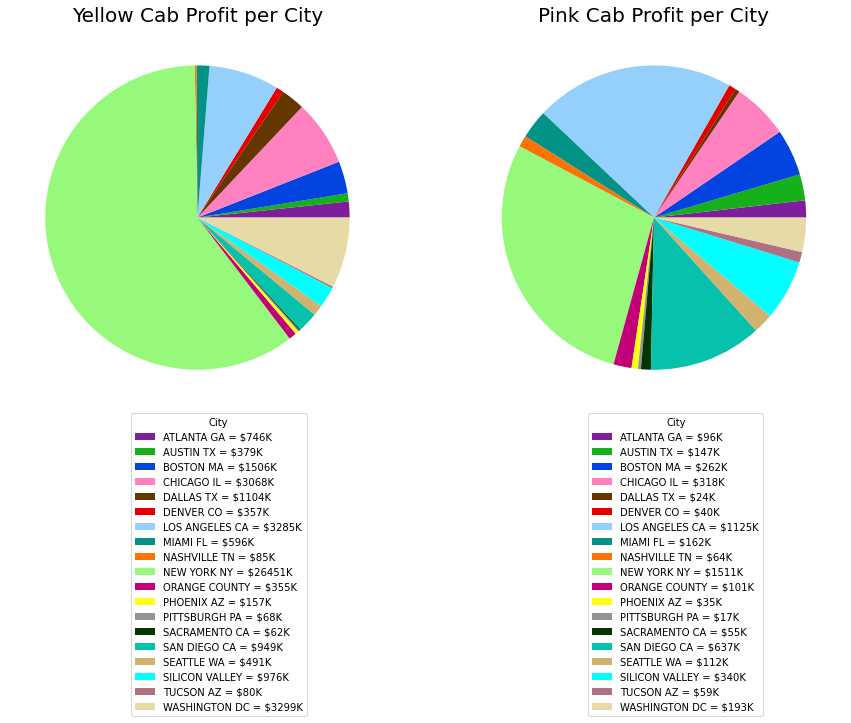

In [94]:
# Create a pie chart for each of the companies and the total profit
pc_colors = ['#7e1e9c','#15b01a','#0343df','#ff81c0','#653700','#e50000','#95d0fc','#029386','#f97306','#96f97b', \
             '#c20078','#ffff14','#929591','#033500','#06c2ac','#d1b26f','#00ffff','#ae7181','#e6daa6']

fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].set_title('Yellow Cab Profit per City', size=20)
ax[0].pie(yellow_city_profit.values, colors=pc_colors)

ax[1].set_title('Pink Cab Profit per City', size=20)
ax[1].pie(pink_city_profit.values, colors=pc_colors)

ax[0].legend(labels=[f'{yellow_city_profit.index[i]} = ${int(yellow_city_profit.values[i]/1000)}K' for i in range(yellow_city_profit.index.size)], \
             title='City', bbox_to_anchor =(0.8, 0.))
ax[1].legend(labels=[f'{pink_city_profit.index[i]} = ${int(pink_city_profit.values[i]/1000)}K' for i in range(pink_city_profit.index.size)], \
             title='City', bbox_to_anchor =(0.8, 0.))

plt.show()

As it can be seen from these pie charts, for Yellow Cab, the 3 most profitable cities are New York City, Washington DC, and Los Angeles. Thise results agree with the previous study where New York City is the city with most transactions and it's also the most profitable.

On the other hand, for Pink Cab the most profitable cities are New York City, Los Angeles, and San Diego. These results sort of agree with the previous study where these cities were also in the to 3 cities with the highest number of transactions.